In [219]:
'''NAME: Muhammad L. Sawaneh'''                             '''EMAIL: laminsawaneh@gmail.com'''

'''Course: Machine Learning'''                              '''Assignment Number: 2'''

'Course: Machine LearningAssignment Number: 2'

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [5]:
# load the data
data = np.loadtxt('gabor_data.out')

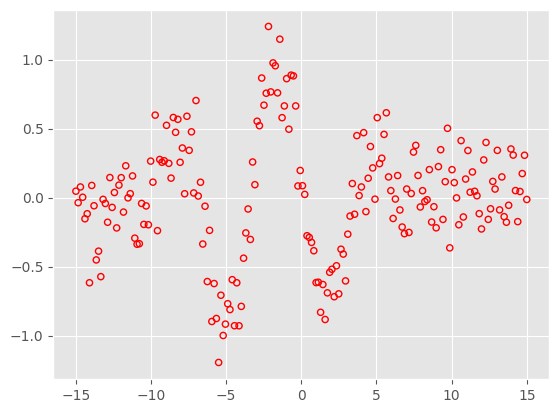

In [6]:
#================================
#Visualizing the data
#================================
xi = data[:, 0]
yi = data[:, 1]
plt.scatter(xi, yi, s=20, facecolors='none', edgecolors='red', linewidths=1)

The aim is to fit the data and choose the model that closely fit.
We consider
1. polynomial regression
$$h_k(x)=x^k$$
2. Gaussian basis function

$$h_k(x)=\exp\{-(x-\mu_k)^2/2\sigma^2\}$$

Remember the mean squared error is defined as
$$MSE=\frac{1}{m}\sum^m_{i=1}(y_i - \hat{f}(x_i,\hat{\theta}))^2$$
where $\hat{\theta}$ is the solution of gradient descent or the normal equation

### Question 1

Polynomial regression

In [223]:
def design_matrix(x, deg):
    # Build the design matrix for general polynomial degree
    #[YOUR CODE HERE]
    X = np.column_stack([x**i for i in range(deg + 1)])
    return X
def fit(X, y):
    """
    X -> design matrxi
    y -> output vector
    """
    #[YOUR CODE HERE]
    coefs = np.linalg.solve(X.T@X , X.T@y)
    return coefs
def predict(X, coefs):
    # evaluate your model using coefs and x_plt
    #[YOUR CODE HERE]
    ypred = X@coefs
    return ypred

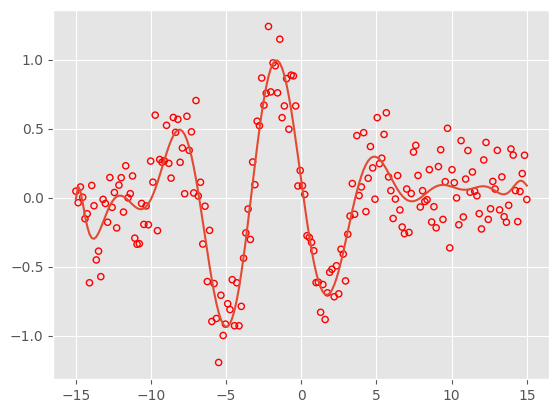

In [224]:
deg = 20
X = design_matrix(xi, deg)
x_plt = np.linspace(xi.min(), xi.max(), 200)
X_plt = design_matrix(x_plt, deg)
coefs = fit(X, yi)
model = predict(X_plt, coefs)

plt.scatter(xi, yi, s=20, facecolors='none', edgecolors='red', linewidths=1)
plt.plot(x_plt, model)

### Question 2

Here you will run different polynomial models

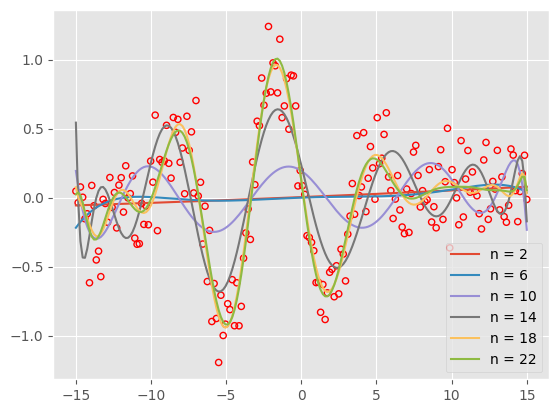

In [225]:
list_of_poly_deg = np.arange(2, 24, 4)
plt.scatter(xi, yi, s=20, facecolors='none', edgecolors='red', linewidths=1)
mse_train_lst = []
for n in list_of_poly_deg:
    X = design_matrix(xi, n)
    X_plt = design_matrix(x_plt, n)
    coefs = fit(X, yi)
    ypred = predict(X_plt, coefs)
    y_pred_train = predict(X, coefs)
    #[YOUR CODE HERE]
    mse = np.mean((yi-y_pred_train)**2)
    mse_train_lst.append(mse)
    plt.plot(x_plt, ypred, label='n = %g'%(n))
plt.legend()
plt.show()

What do you observe, from the above graph?<br>
The approximation gets closer to a function of pieswise as the polynomial degree n increases from 2 to 22, except near the discontinuity.<br>
The graph oscillates on the x-axis and sharp peak near x=0.<br>

Text(0, 0.5, 'training error')

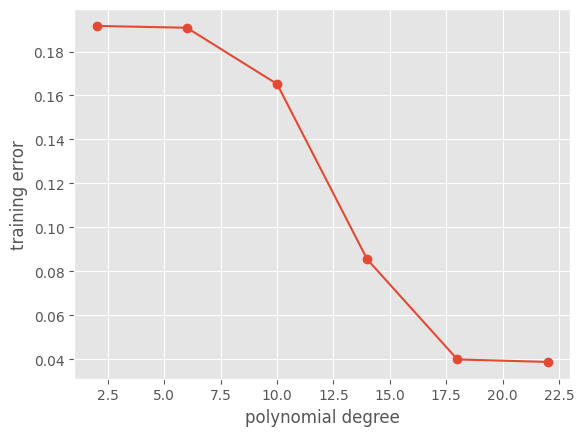

In [226]:
plt.plot(list_of_poly_deg, mse_train_lst, 'o-')
plt.xlabel('polynomial degree')
plt.ylabel('training error')

Comment the above graph<br>
The training error decreases as the polynomial degree increases.<br>
The curve shows that the model keeps improving its fit to training data.<br>

### Question 3

Text(0, 0.5, 'error')

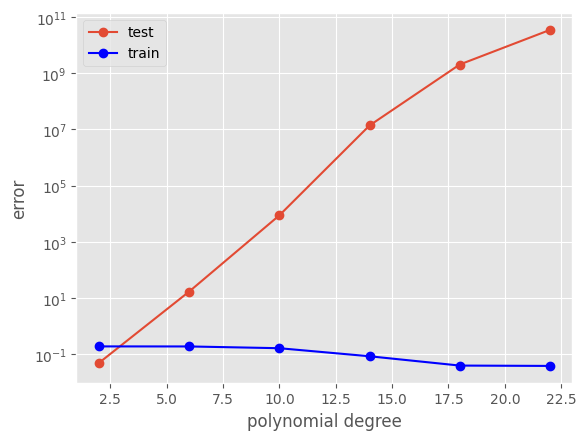

In [227]:
#divide the dataset into training and validation errors
# Consider 80% training set and 20% validation set
#[YOUR CODE HERE]
n_train = int(0.8*len(xi))
#[YOUR CODE HERE]
x_train = xi[:n_train]
y_train = yi[:n_train]
#[YOUR CODE HERE]
x_test = xi[n_train:]
y_test = yi[n_train:]

mse_test_lst = []
for n in list_of_poly_deg:
    X_train = design_matrix(x_train, n)
    X_test = design_matrix(x_test, n)
    coefs = fit(X_train, y_train)
    y_pred_test = predict(X_test, coefs)
    #[YOUR CODE HERE]
    mse = np.mean((y_test-y_pred_test)**2)
    mse_test_lst.append(mse)

plt.semilogy(list_of_poly_deg, mse_test_lst, 'o-', list_of_poly_deg, mse_train_lst, 'bo-')
plt.legend(('test','train'), loc=0)
plt.xlabel('polynomial degree')
plt.ylabel('error')


What is your conclusion<br>
The training error decreases monotonically as polynomial degree increases. While the test error keeps on increasing. The optimal degree is reached at minimal test error. This shows that the model is overfitting the data<br>

### Question 4

This section deals with cross validation

In [228]:
#ONLY CHANGE WHERE IT IS SAID [YOUR CODE HERE]
def k_fold_cv(x, y, deg, k=5):
    # lenght of the training data
    n = len(x)
    indices = np.arange(n)
    np.random.shuffle(indices)
    fold_size = n // k
    mse_val_scores = []
    mse_train_scores = []

    for fold in range(k):
        start = fold * fold_size
        end = start + fold_size
        val_idx = indices[start:end]
        train_idx = np.r_[indices[:start], indices[end:]]

        xi_train, yi_train = x[train_idx], y[train_idx]
        xi_val, yi_val = x[val_idx], y[val_idx]
        X_train = design_matrix(xi_train, deg)
        X_val = design_matrix(xi_val, deg)
        coefs = fit(X_train, yi_train)
        ypred_val = predict(X_val, coefs)
        ypred_train = predict(X_train, coefs)
        #[YOUR CODE HERE]
        mse_val_scores.append(np.mean((yi_val-ypred_val)**2))
        #[YOUR CODE HERE]
        mse_train_scores.append(np.mean((yi_train- ypred_train)**2))

    return mse_val_scores, mse_train_scores
scores_val, scores_train = k_fold_cv(xi, yi, 20, k=5)
print("MSE for each fold for validation set:", scores_val)
print("Average MSE:", np.mean(scores_val), np.mean(scores_train))

MSE for each fold for validation set: [np.float64(0.06118776011970908), np.float64(0.0732366512891489), np.float64(0.03554606806848141), np.float64(0.036103583127899894), np.float64(0.05804293880783773)]
Average MSE: 0.052823400282615396 0.03789840792363577


Text(0, 0.5, 'training error')

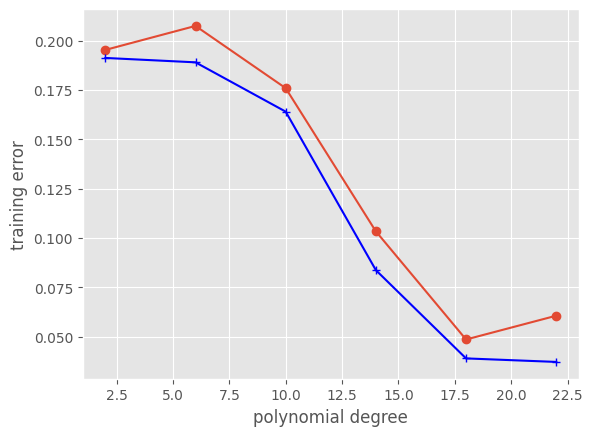

In [229]:
mse_val_lst = []
mse_train_lst =[]
for n in list_of_poly_deg:
    scores_val, scores_train = k_fold_cv(xi, yi, n, k=5)
    mse_val_lst.append(np.mean(scores_val))
    mse_train_lst.append(np.mean(scores_train))
plt.plot(list_of_poly_deg, mse_val_lst, 'o-', list_of_poly_deg, mse_train_lst, 'b+-')
plt.xlabel('polynomial degree')
plt.ylabel('training error')

Based on the above graph, what model would you consider? Justify your answer.<br>
The training error is minimize at polynomial degree of 10. Higher degrees add unnecessary complexity. <br>
We would choose model degree 10 as it offers a good trade-off between bias and variance.<br>

### Question 5

Regularization

In [230]:
def fit_lr(X, y, la):

    # Build the design matrix for general polynomial degree
    #[YOUR CODE HERE]
    coefs = np.linalg.solve((X.T@ X+(la*np.eye(X.shape[1]))) ,X.T@y)
    return coefs

<>:8: SyntaxWarning: invalid escape sequence '\l'
<>:8: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipython-input-1033735911.py:8: SyntaxWarning: invalid escape sequence '\l'
  plt.plot(x_plt, model, linewidth=2, label='$\lambda=$%0.3f'%la)


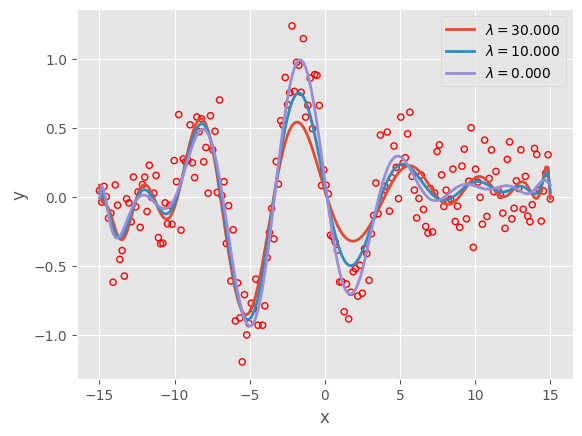

In [231]:
la_lst = [30.0, 10.0, 0.0]
plt.scatter(xi, yi, s=20, facecolors='none', edgecolors='red', linewidths=1)
for la in la_lst:
    X = design_matrix(xi, deg)
    X_plt = design_matrix(x_plt, deg)
    coefs = fit_lr(X, yi, la)
    model = predict(X_plt, coefs)
    plt.plot(x_plt, model, linewidth=2, label='$\lambda=$%0.3f'%la)

plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

What happens to the model as $\lambda$ gets large?<br>
As $\lambda$ gets large, the model is heavily penalized for complexity. The model approaches $0$ in the limit of the model, resulting in an overly smooth, underfit model.<br>
__________________________________________________<br>

<>:11: SyntaxWarning: invalid escape sequence '\l'
<>:11: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipython-input-3973801844.py:11: SyntaxWarning: invalid escape sequence '\l'
  plt.xlabel('$\lambda$')


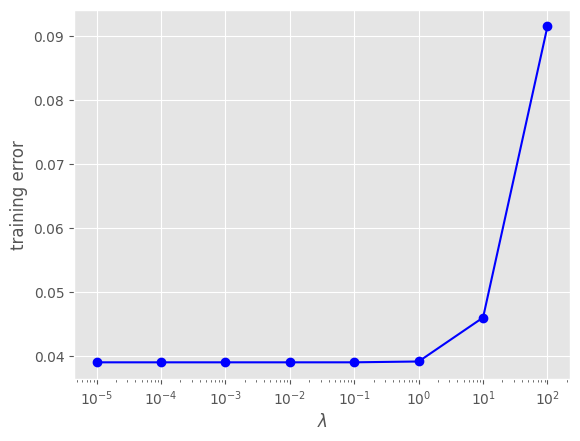

In [232]:
mse_test_lst_lr = []
mse_train_lst_lr = []
la_lst = np.logspace(-5, 2, 8)
for la in la_lst:
    X_train = design_matrix(xi, deg)
    coefs = fit_lr(X_train, yi, la)
    y_pred_train = predict(X_train, coefs)
    #[YOUR CODE HERE]
    mse_train_lst_lr.append(np.mean((yi-y_pred_train)**2))
plt.semilogx(la_lst, mse_train_lst_lr, 'bo-')
plt.xlabel('$\lambda$')
plt.ylabel('training error')
plt.show()


What do you observe?<BR>
For a very small values of $\lambda $, the training error stays low and almost constant.<br>
When the $\lambda$ become large the model underfit the data, which lead to a sharp increase in the training error. <br>

### Question 6

Gaussian

In [233]:

mu = np.array([0.96682181, 0.11339223, 0.34433317, 0.16548527, 0.40411627,
       0.68989358, 0.10684011, 0.20338468, 0.66804714, 0.05204953])
sig = 2
def design_matrix_gaussian(x, mu, sig):
    #[YOUR CODE HERE]
    X = np.exp(-1 *(x[:,np.newaxis]-mu[np.newaxis,:])**2 / (2*sig**2))
    return X

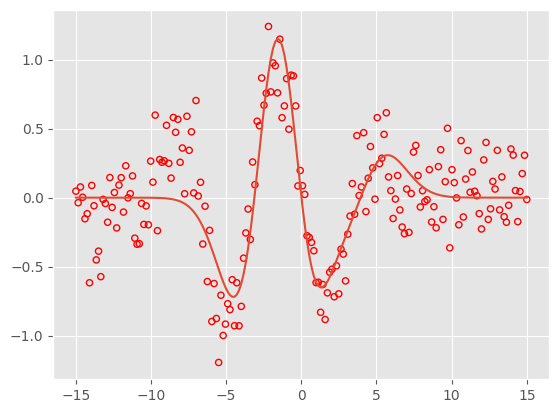

In [234]:
X_gaussian = design_matrix_gaussian(xi, mu, sig)
coefs1 = fit(X_gaussian, yi)
X_plt = design_matrix_gaussian(x_plt, mu, sig)
gaussian_model = predict(X_plt, coefs1)
plt.scatter(xi, yi, s=20, facecolors='none', edgecolors='red', linewidths=1)
plt.plot(x_plt, gaussian_model)

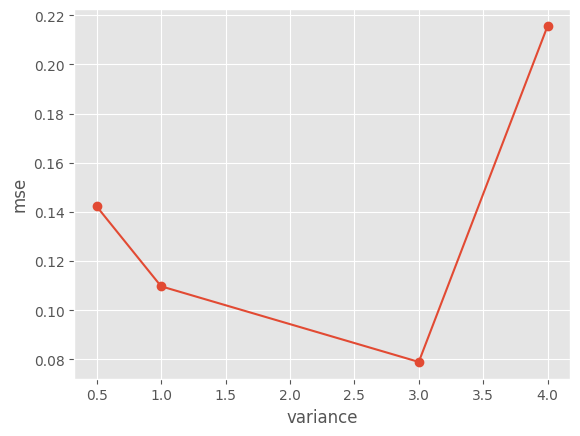

In [235]:
sig_lst = [4,3,1,0.5]
gaussian_mse = []
for sig in sig_lst:
    X_gaussian = design_matrix_gaussian(xi, mu, sig)
    coefs1 = fit(X_gaussian, yi)
    ypred = predict(X_gaussian, coefs1)
    #[YOUR CODE HERE]
    mse = np.mean((ypred - yi)**2)
    gaussian_mse.append(mse)
plt.plot(sig_lst, gaussian_mse, 'o-')
plt.xlabel('variance')
plt.ylabel('mse')
plt.show()

From the above graph, what do you observe and what parameter value would you consider?<br>
We obsere that the MSE decreases as the variance increases from 0.5 and reaching its minimum at 3. The MSE rises as variance increases from 3 to 4. Hence, we would take variance to be 3 because it gives the lowest MSE on the graph, thus the best model performance.<br>
______________________________________________________________________________________<br>

### Question 7

The Radial basis is given by
$$\hat{f}(x:\theta)=\sum^m_{i=1} \theta_i\phi(\|x-x_i\|)$$
where
$$\phi(x,x_i)=\phi(\|x-x_i\|)=\exp\{(s\|x-x_i\|)^2\}$$
The design matrix is then given by
\begin{equation}
           X=
           \begin{pmatrix}
             \phi(x_1,x_1)&\phi(x_2,x_1)&\cdots&\phi(x_m,x_1)\\
             \phi(x_1,x_2)&\phi(x_2,x_2)&\cdots&\phi(x_m,x_2)\\
             \phi(x_1,x_{m-1})&\phi(x_2,x_{m-1})&\vdots&\phi(x_m,x_{m-1})\\
             \phi(x_1,x_m)&\phi(x_2,x_m)&\cdots&\phi(x_m,x_m)
           \end{pmatrix}
\end{equation}
where $\|\cdot\|$ is the norm 2

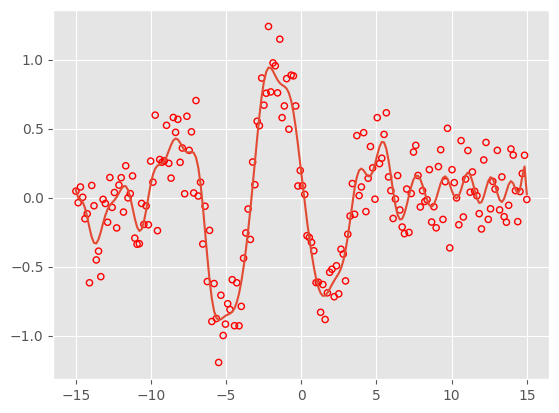

In [236]:
s = 0.5
def design_matrix_radial(x, y, s):
    #[YOUR CODE HERE]
    phi = np.abs( (x.reshape(-1,1) - x.reshape(1,-1)) )
    X = np.exp(-(s * phi)**2)
    #np.column_stack([np.exp(-(x - i)**2 / (2 * s**2)) for i in x])
    return X


X_radial = design_matrix_radial(xi, yi, s)
coefs2 = fit(X_radial, yi)
radial_model = predict(X_radial, coefs2)
plt.scatter(xi, yi, s=20, facecolors='none', edgecolors='red', linewidths=1)
plt.plot(xi, radial_model)


What do you observe?<br>
The model is oscillating along the y-axis between -1 and +1 and tightly fits the data points very closely.<br>
The model seems to overfit, it captures noise along with the signal.<br>